# Notebook

## Setting up

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from transformers import pipeline

# suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
df = pd.read_pickle("data/data_original.pkl")

down_sample_percentage = 5

# down sample data
df = df.sample(frac=down_sample_percentage/100, random_state=1)

# rename emotions to label and map to integers
df.rename(columns={'emotions':'label'}, inplace = True)
label_map = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5} 
df['label'] = df['label'].map(label_map)

print(df.shape)
df.head()

(20840, 2)


,text,label
98790,i wanted them to feel now i feel as though i a...,0
18398,i found myself feeling very sympathetic toward...,2
139349,ive been feeling pretty good today and tonight...,1
13416,i can use to cover my ass when i feel inadequate,0
22297,i feel like ive pissed myself again,3


In [21]:
model_name = "SamLowe/roberta-base-go_emotions"


classifier = pipeline(task="text-classification", model=model_name, top_k=None)

# taking the first of the 28 labels that is present in our 6 emotion labels (highest probability)
def guessEmotion(sentence):
    model_outputs = classifier([sentence])[0]
    for emotion in model_outputs:
        if emotion['label'] in label_map:
            return emotion['label']

def show_cm(cm, classes, figsize=(10, 10)):
    # cm = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=figsize)
    plt.imshow(cm)
    plt.suptitle('Confusion matrix')
    total = sum(sum(cm))
    plt.title('Total cases: {}'.format(total))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            perc = round(cm[i, j] / total * 100, 1)
            plt.text(j, i, f"{format(cm[i, j], '.0f')} : {perc}%", horizontalalignment="center",
                     color="black" if cm[i, j] > cm.max() / 2 else "white")

    plt.show()

In [22]:
# make predictions on the test set
df['predicted'] = df['text'].apply(guessEmotion)
df['predicted'] = df['predicted'].map(label_map)

In [23]:
df.head()

,text,label,predicted
98790,i wanted them to feel now i feel as though i a...,0,0
18398,i found myself feeling very sympathetic toward...,2,2
139349,ive been feeling pretty good today and tonight...,1,0
13416,i can use to cover my ass when i feel inadequate,0,0
22297,i feel like ive pissed myself again,3,4


Accuracy: 0.5607485604606526
Precision: 0.505751154248805
Recall: 0.4794437331250774
F1: 0.484747642869138


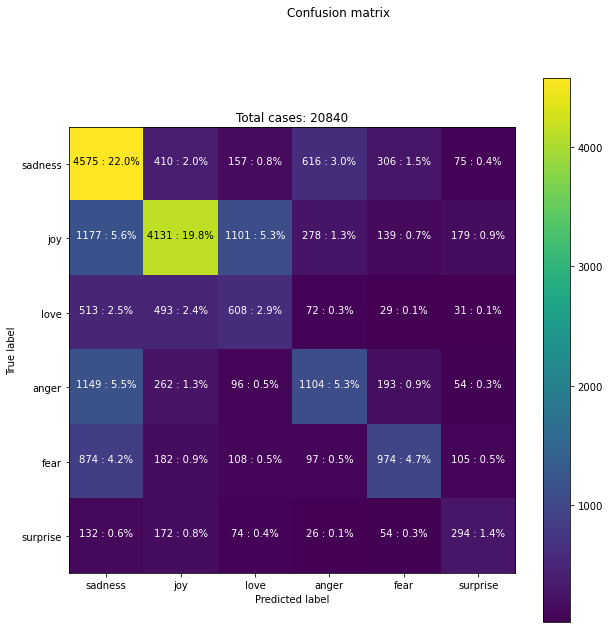

In [24]:
# compare predicted and true labels, calculate accuracy, precision, recall, f1 and confusion matrix
accuracy = accuracy_score(df['label'], df['predicted'])
precision = precision_score(df['label'], df['predicted'], average='macro')
recall = recall_score(df['label'], df['predicted'], average='macro')
f1 = f1_score(df['label'], df['predicted'], average='macro')
confusion = confusion_matrix(df['label'], df['predicted'])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
show_cm(confusion, label_map.keys())

In [25]:
# display individual accuracy, precision, recall and f1 for each emotion
for emotion in label_map.keys():
    accuracy = accuracy_score(df[df['label'] == label_map[emotion]]['label'], df[df['label'] == label_map[emotion]]['predicted'])
    precision = precision_score(df[df['label'] == label_map[emotion]]['label'], df[df['label'] == label_map[emotion]]['predicted'], average='macro')
    recall = recall_score(df[df['label'] == label_map[emotion]]['label'], df[df['label'] == label_map[emotion]]['predicted'], average='macro')
    f1 = f1_score(df[df['label'] == label_map[emotion]]['label'], df[df['label'] == label_map[emotion]]['predicted'], average='macro')
    print(f"Emotion: {emotion}")
    print(f"Accuracy: {round(accuracy, 3)}")
    print(f"Precision: {round(precision, 3)}")
    print(f"Recall: {round(recall, 3)}")
    print(f"F1: {round(f1, 3)}")
    print()
    

Emotion: sadness
Accuracy: 0.745
Precision: 0.167
Recall: 0.124
F1: 0.142

Emotion: joy
Accuracy: 0.59
Precision: 0.167
Recall: 0.098
F1: 0.124

Emotion: love
Accuracy: 0.348
Precision: 0.167
Recall: 0.058
F1: 0.086

Emotion: anger
Accuracy: 0.386
Precision: 0.167
Recall: 0.064
F1: 0.093

Emotion: fear
Accuracy: 0.416
Precision: 0.167
Recall: 0.069
F1: 0.098

Emotion: surprise
Accuracy: 0.391
Precision: 0.167
Recall: 0.065
F1: 0.094



/home/m/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/m/.local/lib/python3.10/site-packages/sklearn/metrics/_